# 18 다양한 OCR모델 비교하기

## 18.1 Google OCR API

In [1]:
# 함수 구현

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [2]:
# 함수 호출

# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/optimise.jpeg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-rw-r-- 1 aiffel-dj48 aiffel-dj48 2343  3월 16 11:27 /home/aiffel-dj48/aiffel/ocr_python/my_google_api_key.json
Texts:

"MRE
Nutrition Facts
Serving Size: 4 Scoop (130g)
Servings Per Container: 25
%D.V.
Per 100g
Amount Per Serving
525
404
Calories
Calories from fat
35
27
3g
49
6%
Total Fat
Saturated Fat
Trans fat
Cholesterol
Sodium
Potassium
4g
<1g
Og
Omg
200mg
250mg
75g
8g
5g
479
0%
0%
8%
7%
154mg
192mg
58g
6g
49
369
25%
32%
Total Carbohydrate
Dietary Fiber
Sugar
Protein
84%
0%
0%
0%
Vitamin A
Vitamin C
Calcium
0%
Iron
Ingredients: Rolled Oats, Protein Blend (Beef Protein Isolate (bovine),
Salmon Protein, Chicken Protein, Egg Albumin, Brown Rice Protein, and
Pea Protein), Dehydrated Yam, Dehydrated Sweet Potato, Pea Starch, Coco-
nut Water Powder, Dehydrated Blueberry Fruit, Dehydrated Goji Fruit,
Maltodextrin, Dextrose, MCT Oil, Natural Flavor, Cellulose Gum, Cinam-
mon, Salt, Sucralose, Acesulfame-Potassium.
"

"MRE"

"Nutrition"

"Facts"

"Serving"

"Size:"

"4"

"Scoop"

"(130g)

(738, 500, 3)


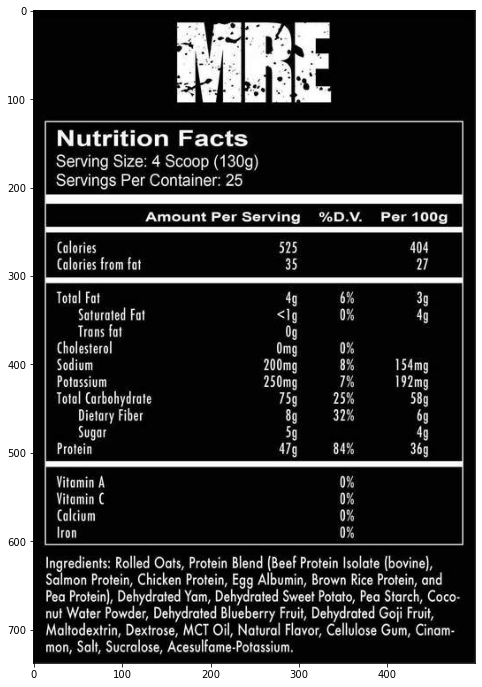

In [3]:
# 이미지 불러오기

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv2.imread(path) 
print (img_orig.shape)

plt.figure(figsize=(24,12))
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))

## 18.2 keras-ocr 

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj48/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj48/.keras-ocr/crnn_kurapan.h5


In [6]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://www.google.com/url?sa=i&url=https%3A%2F%2Fshop.hercs.com%2Fproducts%2Fredcon1-mre-7-15lb&psig=AOvVaw2xEhC8uoQmns6p1Wg68Fey&ust=1616590036427000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCNCGgKm5xu8CFQAAAAAdAAAAABAO']
# 위 링크 수정해야함
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
